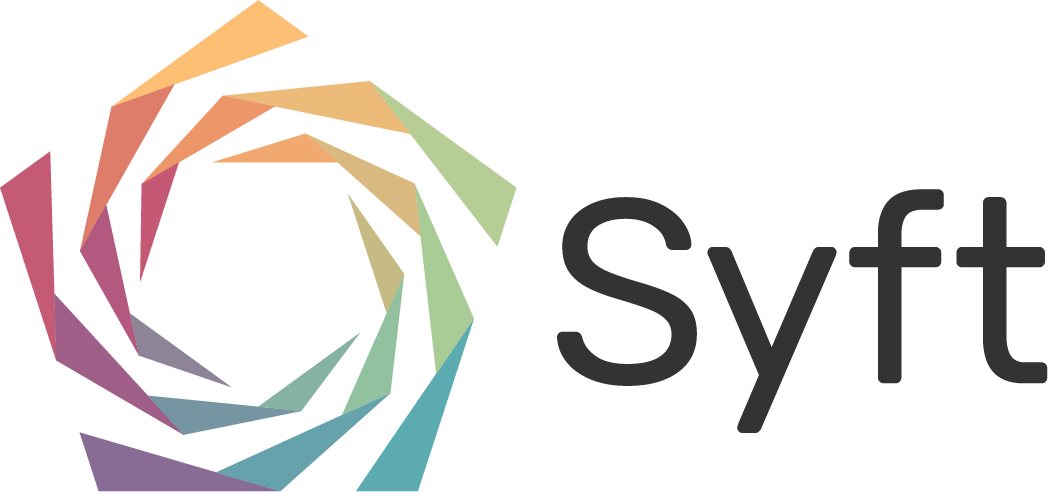

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet = sy.join_duet(loopback=True)

## Load and send data

In [2]:
# Change this path to any available CSV on your machine
CSV_DATASET='/cache/datasets/paysim/PS_20174392719_1491204439457_log.csv'

In [3]:
import pandas as pd
df = pd.read_csv(CSV_DATASET)
df = df.head(50)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
sy.load("sklearn")
sy.load("pandas")

In [6]:
remote_df = df.send(duet)

/home/ben/code/om/PySyft/src/syft/ast/klass.py:308: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  which_obj.tags = tags


## Model

In [7]:
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
Y = pd.DataFrame(df['isFraud'])

remote_X = X.send(duet)
remote_Y = Y.send(duet)

In [8]:
import sklearn
classifier = sklearn.linear_model.LogisticRegression()

In [9]:
remote_sklearn = duet.sklearn

In [10]:
remote_classifier = remote_sklearn.linear_model.LogisticRegression()

In [11]:
remote_classifier.fit(remote_X, remote_Y)

In [12]:
a = remote_classifier.predict(remote_X)

In [13]:
a.request(reason="See output", timeout_secs = -1))
a.get()

/home/ben/code/om/PySyft/src/syft/core/store/storeable_object.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.read_permissions = {}
/home/ben/code/om/PySyft/src/syft/core/store/storeable_object.py:200: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.search_permissions = {}
/home/ben/code/om/PySyft/src/syft/core/store/storeable_object.py:199: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.read_permissions = {}
/home/ben/code/om/PySyft/src/syft/core/store/storeable_object.py:200: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/inde

,0
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0
